In [66]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

In [67]:
YEAR = 2018
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_excel('WB GDP 2019.xls')

#viewing the first 5
POP_INDICATOR = 'SP.POP.TOTL'
popReset = pd.read_excel('WB POP 2019.xls')
popReset.head()

,Country Name,Year,SP.POP.TOTL,2019
0,Aruba,2018,105845.0,106314.0
1,Afghanistan,2018,37172386.0,38041754.0
2,Angola,2018,30809762.0,31825295.0
3,Albania,2018,2866376.0,2854191.0
4,Andorra,2018,77006.0,77142.0


In [68]:
#viewing the last 5
lifeReset.tail()

,Country Name,Year,SP.POP.TOTL,2019
259,Kosovo,2018,1797085.0,1788878.0
260,"Yemen, Rep.",2018,28498687.0,29161922.0
261,South Africa,2018,57792520.0,58558267.0
262,Zambia,2018,17351822.0,17861030.0
263,Zimbabwe,2018,14439018.0,14645468.0


In [69]:
#dropping empty cells
gdpCountries = gdpReset.dropna()
popCountries = popReset.dropna()

In [70]:
gdpCountries

,Country Name,Year,NY.GDP.MKTP.CD
1,Afghanistan,2018,1.835388e+10
2,Angola,2018,1.013532e+11
3,Albania,2018,1.514702e+10
4,Andorra,2018,3.218316e+09
5,Arab World,2018,2.771384e+12
...,...,...,...
259,Kosovo,2018,7.942962e+09
260,"Yemen, Rep.",2018,2.348627e+10
261,South Africa,2018,3.682889e+11
262,Zambia,2018,2.631214e+10


In [71]:
popCountries

,Country Name,Year,SP.POP.TOTL,2019
0,Aruba,2018,105845.0,106314.0
1,Afghanistan,2018,37172386.0,38041754.0
2,Angola,2018,30809762.0,31825295.0
3,Albania,2018,2866376.0,2854191.0
4,Andorra,2018,77006.0,77142.0
...,...,...,...,...
259,Kosovo,2018,1797085.0,1788878.0
260,"Yemen, Rep.",2018,28498687.0,29161922.0
261,South Africa,2018,57792520.0,58558267.0
262,Zambia,2018,17351822.0,17861030.0


In [86]:
#rounding the gdp to millions the converting to Pounds
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

<ipython-input-86-a959c0662e2a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)


,Country Name,Year,NY.GDP.MKTP.CD,GDP,GDP (£m)
1,Afghanistan,2018,1.835388e+10,11729,11729
2,Angola,2018,1.013532e+11,64772,64772
3,Albania,2018,1.514702e+10,9680,9680
4,Andorra,2018,3.218316e+09,2057,2057
5,Arab World,2018,2.771384e+12,1771115,1771115


In [88]:
#new headings
COUNTRY = 'Country Name'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,Country Name,GDP (£m)
1,Afghanistan,11729
2,Angola,64772
3,Albania,9680
4,Andorra,2057
5,Arab World,1771115


In [98]:
#merging the two tables using merge
gdpVsPop = pd.merge(gdpClean, popClean, on=COUNTRY, how='inner')
gdpVsPop.head()

,Country Name,GDP (£m),Population
0,Afghanistan,11729,37172386
1,Angola,64772,30809762
2,Albania,9680,2866376
3,Andorra,2057,77006
4,Arab World,1771115,419790591


In [99]:
gdpClean.shape

(249, 2)

In [100]:
popClean.shape

(262, 2)

In [101]:
#checking correlation to see if there is any relation between population and gdp
#results show the correlation is significant in some sense.
from scipy.stats import spearmanr

gdpColumn = gdpVsPop[GDP]
popColumn = gdpVsPop[POPULATION]
(correlation, pValue) = spearmanr(gdpColumn, popColumn)
print(f'The correlation is: ' + str(correlation) + '\n The pValue is:' + str(pValue))
print('=============================================================================')
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is: 0.8665517812295228
 The pValue is:1.645714789781199e-76
It is statistically significant.


<AxesSubplot:xlabel='GDP (£m)', ylabel='Population'>

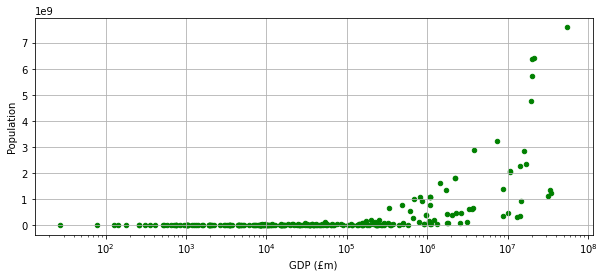

In [102]:
%matplotlib inline
gdpVsPop.plot(x=GDP, y=POPULATION, kind='scatter', grid=True, logx=True, figsize=(10, 4), color = 'g')

In [103]:
# the 10 countries with lowest GDP in 2018
gdpVsPop.sort_values(GDP).head(10)

,Country Name,GDP (£m),Population
231,Tuvalu,27,11508
170,Nauru,79,12704
117,Kiribati,126,115847
147,Marshall Islands,141,58413
179,Palau,179,17907
74,"Micronesia, Fed. Sts.",257,112640
206,Sao Tome and Principe,263,211028
225,Tonga,313,103197
53,Dominica,352,71625
8,American Samoa,406,55465


In [104]:
# the 10 countries with highest Life expectancy
gdpVsPop.sort_values(POPULATION, ascending = False).head(10)

,Country Name,GDP (£m),Population
242,World,55241047,7592026859
97,IDA & IBRD total,21110041,6410753795
133,Low & middle income,20333980,6361444576
148,Middle income,19992765,5710116989
96,IBRD only,19688360,4777272280
58,Early-demographic dividend,7442627,3248252342
132,Lower middle income,3839103,2872399930
235,Upper middle income,16151459,2837717059
59,East Asia & Pacific,16840417,2328197666
135,Late-demographic dividend,14384781,2287848296
